In [ ]:
#Prophet model for time series forecast
from prophet import Prophet



#Data processing
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


In [ ]:

bcm = pd.read_csv(r"C:\Users\Parsazh\Documents\GitHub\Machine-Learning\data\BCM_DATA.csv",index_col=[0],parse_dates=[0])


In [ ]:
train_end_date = pd.to_datetime('2024-03-01')

bcm_train = bcm.loc[bcm.index <= train_end_date].copy()
bcm_test = bcm.loc[bcm.index > train_end_date].copy()

print(bcm_train.tail())

# Format data for prophet model using ds and y
bcm_train_prophet = bcm_train["TOT_PAID"].reset_index().rename(columns={'ACC_MONTH':'ds','TOT_PAID':'y'})
bcm_test_prophet = bcm_test["TOT_PAID"].reset_index().rename(columns={'ACC_MONTH':'ds','TOT_PAID':'y'})
#print(bcm_train_prophet.head())


In [7]:

#model fit:
model = Prophet()
model.fit(bcm_train_prophet)

# Predict on test set with model

bcm_test_fcst = model.predict(bcm_test_prophet)
bcm_train_fcst= model.predict(bcm_train_prophet) # fit the model on training dataset
print(bcm_test_fcst.head())
print(bcm_train_fcst.head())

19:54:35 - cmdstanpy - INFO - Chain [1] start processing
19:54:36 - cmdstanpy - INFO - Chain [1] done processing


          ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2024-04-01  2.001053e+06  1.737213e+06  2.711012e+06  2.001053e+06   
1 2024-05-01  2.001451e+06  1.600937e+06  2.557936e+06  2.001451e+06   
2 2024-06-01  2.001863e+06  1.483137e+06  2.471903e+06  2.001863e+06   
3 2024-07-01  2.002261e+06  1.733654e+06  2.702314e+06  2.002261e+06   
4 2024-08-01  2.002672e+06  1.372508e+06  2.320153e+06  2.002672e+06   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  2.001053e+06   224625.505407         224625.505407         224625.505407   
1  2.001451e+06    77238.516836          77238.516836          77238.516836   
2  2.001863e+06   -16914.872728         -16914.872728         -16914.872728   
3  2.002261e+06   226815.183717         226815.183717         226815.183717   
4  2.002672e+06  -163620.074181        -163620.074181        -163620.074181   

          yearly   yearly_lower   yearly_upper  multiplicative_terms  \
0  224625.505407  22

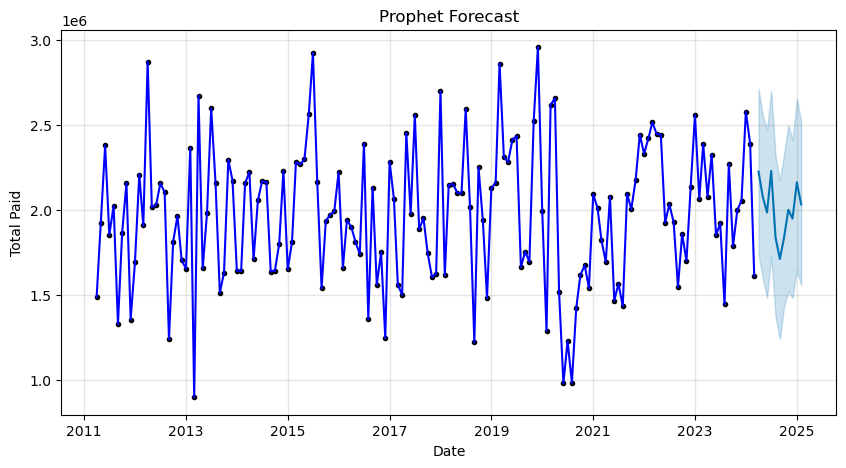

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(bcm_test_fcst, ax=ax, xlabel='Date', ylabel='Total Paid')
ax.plot(bcm_train.index, bcm_train['TOT_PAID'], color='b')

ax.set_title('Prophet Forecast')


#fig = model.plot_components(bcm_test_fcst)

plt.show()




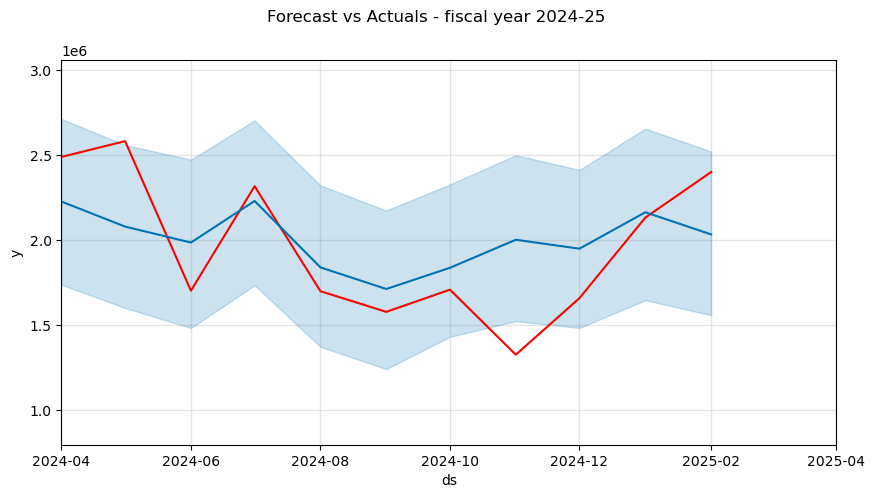

In [25]:

#plot one fiscal year

lower_bound = pd.to_datetime('2024-04-01')  # Ensure correct format
upper_bound = pd.to_datetime('2025-04-01')

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(bcm_test.index, bcm_test['TOT_PAID'], color='r')
fig = model.plot(bcm_test_fcst, ax=ax)
# Set x-axis limits with datetime values
ax.set_xbound(lower=lower_bound, upper=upper_bound)
#ax.set_ylim(0, 60000)
plot = plt.suptitle('Forecast vs Actuals - fiscal year 2024-25')
plt.show()


Text(0.5, 1.0, 'Forecast vs Actuals - simulation')

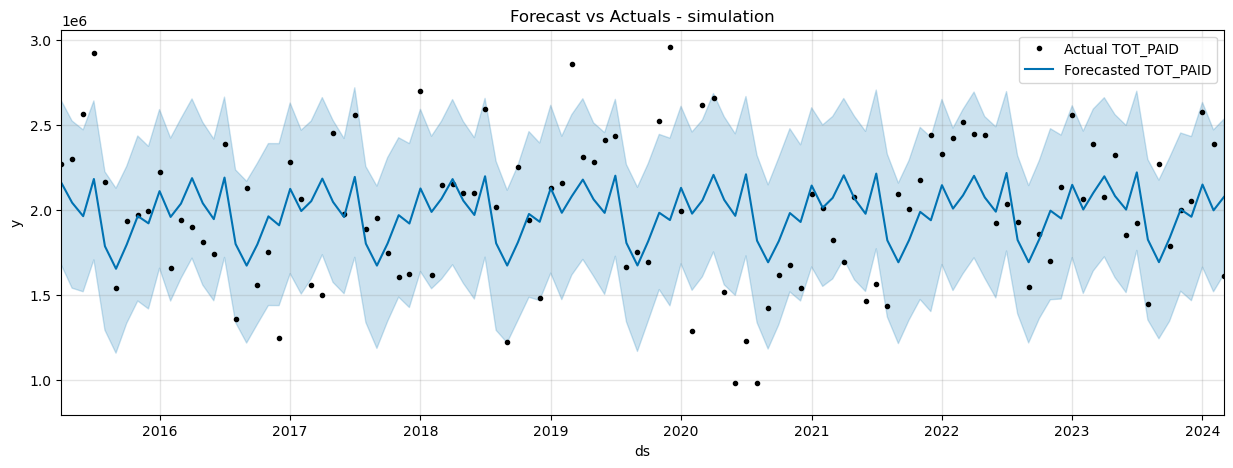

In [ ]:
#plot the forecast with the actual ternd in trained dataset

# Plot the forecast with the actuals

lower_bound = pd.to_datetime('2015-04-01')  # Ensure correct format
upper_bound = pd.to_datetime('2024-03-01')

f, ax = plt.subplots(figsize=(15, 5))
ax.plot(bcm_train.index, bcm_train['TOT_PAID'], color='r')
fig = model.plot(bcm_train_fcst, ax=ax)
ax.set_xbound(lower=lower_bound, upper=upper_bound)
# Add legend
ax.legend(['Actual TOT_PAID', 'Forecasted TOT_PAID'])
ax.set_title('Forecast vs Actuals - simulation')
#plt.show()



In [28]:
#check the model's accuracy

mean_squared_error_b = np.sqrt(mean_squared_error(y_true=bcm_test['TOT_PAID'],
                   y_pred=bcm_test_fcst['yhat']))

mean_absolute_error=mean_absolute_error(y_true=bcm_test['TOT_PAID'],
                   y_pred=bcm_test_fcst['yhat'])
mean_absolute_percentage_error=mean_absolute_percentage_error(y_true=bcm_test['TOT_PAID'],
                   y_pred=bcm_test_fcst['yhat'])



print("mean_squared_error:", mean_squared_error_b)
print("mean_absolute_error:", mean_absolute_error)
print("mean_absolute_percentage_error:", mean_absolute_percentage_error)



mean_squared_error: 321583.52358719683
mean_absolute_error: 263604.7944761295
mean_absolute_percentage_error: 0.1452692812027068


C:\Users\Parsazh\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


321583.52358719683


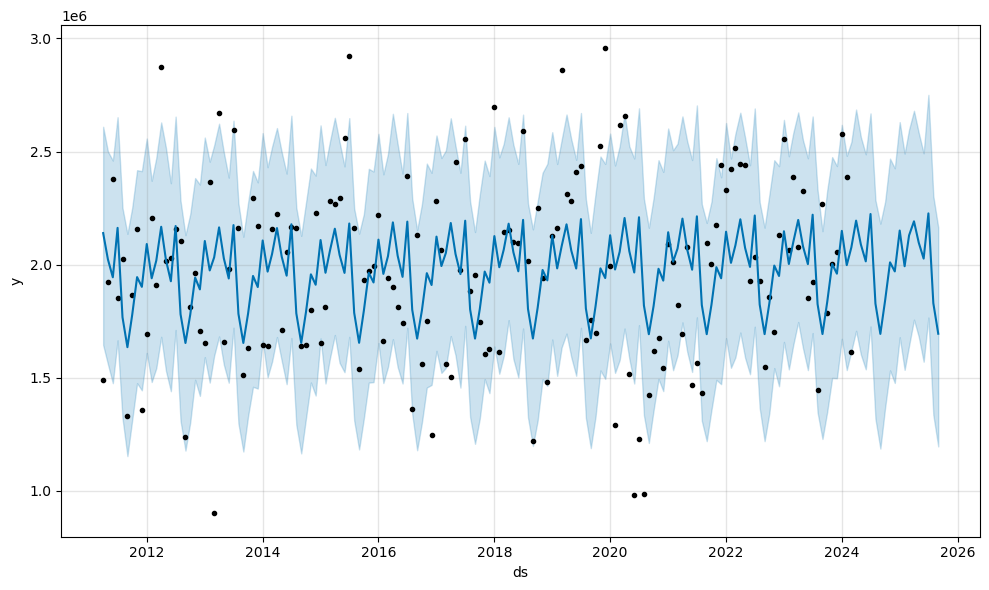

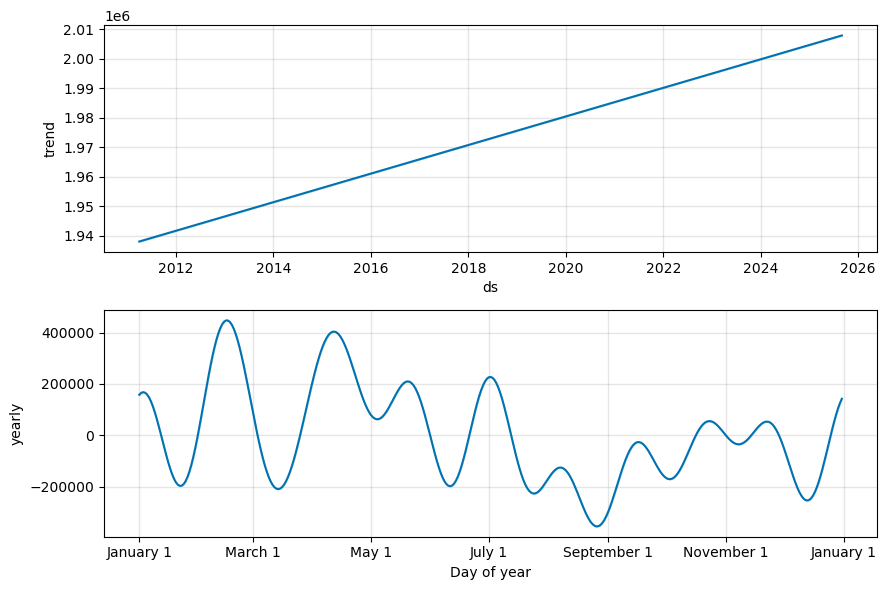

In [35]:
# Create the time range for the forecast
future_baseline = model.make_future_dataframe(periods=18,freq='M',include_history=True)
#print(future_baseline.tail(20))

# Make prediction
forecast_baseline = model.predict(future_baseline)
#print(forecast_baseline.tail(20))
# Visualize the forecast
model.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

# Visualize the forecast components
model.plot_components(forecast_baseline)

#plt.show()
#check the model's accuracy

mean_squared_error_b = np.sqrt(mean_squared_error(y_true=bcm_test['TOT_PAID'],
                   y_pred=bcm_test_fcst['yhat']))
print(mean_squared_error_b)

In [36]:
# Add seasonality
model_season = Prophet(yearly_seasonality=True)

# Fit the model on the training dataset
model_season.fit(bcm_train_prophet)
bcm_test_fcst_season = model_season.predict(bcm_test_prophet)

print(bcm_test_fcst_season.head())
print(bcm_test_fcst.head())
print()



#check the model's accuracy

mean_squared_error_season = np.sqrt(mean_squared_error(y_true=bcm_test['TOT_PAID'],y_pred=bcm_test_fcst_season['yhat']))

print("mean_squared_error:", mean_squared_error_b)
print("mean_squared_error_season:", mean_squared_error_season)


20:19:03 - cmdstanpy - INFO - Chain [1] start processing
20:19:03 - cmdstanpy - INFO - Chain [1] done processing


          ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2024-04-01  2.001053e+06  1.743817e+06  2.695041e+06  2.001053e+06   
1 2024-05-01  2.001451e+06  1.627611e+06  2.540158e+06  2.001451e+06   
2 2024-06-01  2.001863e+06  1.503618e+06  2.449436e+06  2.001863e+06   
3 2024-07-01  2.002261e+06  1.748745e+06  2.659912e+06  2.002261e+06   
4 2024-08-01  2.002672e+06  1.374058e+06  2.351410e+06  2.002672e+06   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  2.001053e+06   224625.505407         224625.505407         224625.505407   
1  2.001451e+06    77238.516836          77238.516836          77238.516836   
2  2.001863e+06   -16914.872728         -16914.872728         -16914.872728   
3  2.002261e+06   226815.183717         226815.183717         226815.183717   
4  2.002672e+06  -163620.074181        -163620.074181        -163620.074181   

          yearly   yearly_lower   yearly_upper  multiplicative_terms  \
0  224625.505407  22

In [46]:
# Format data for prophet model using ds and y & regressor
bcm_train_prophet = bcm_train[["TOT_PAID","BUDGET_AMT","NBR_MURDER"]].reset_index().rename(columns={'ACC_MONTH':'ds'
                                                                                                  ,'TOT_PAID':'y'
                                                                                                  ,'BUDGET_AMT':'bud'
                                                                                                  ,'NBR_MURDER':'case'})
bcm_test_prophet  =  bcm_test[["TOT_PAID","BUDGET_AMT","NBR_MURDER"]].reset_index().rename(columns={'ACC_MONTH':'ds'
                                                                                       ,'TOT_PAID':'y'
                                                                                       ,'BUDGET_AMT':'bud'
                                                                                       ,'NBR_MURDER':'case'})

# Add seasonality 
model_multivariate = Prophet(yearly_seasonality=True)


# Add regressor
model_multivariate.add_regressor('bud', standardize=False)
model_multivariate.add_regressor('case', standardize=False)

# Fit the model on the training dataset
model_multivariate.fit(bcm_train_prophet)
bcm_multi_prdct = model_multivariate.predict(bcm_test_prophet)
bcm_multi_prdct_train = model_multivariate.predict(bcm_train_prophet)

#check the model's accuracy

mean_squared_error_multi = np.sqrt(mean_squared_error(y_true=bcm_test['TOT_PAID'],y_pred=bcm_multi_prdct['yhat']))

print("mean_squared_error:", mean_squared_error_b)
print("mean_squared_error_season:", mean_squared_error_season)
print("mean_squared_error_multi:", mean_squared_error_multi)

print(bcm_train.columns)
bcm_multi_prdct_train.head()

#https://www.kaggle.com/code/pythonafroz/fb-prophet-with-multiple-regressors

20:33:32 - cmdstanpy - INFO - Chain [1] start processing
20:33:32 - cmdstanpy - INFO - Chain [1] done processing
20:33:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:33:32 - cmdstanpy - INFO - Chain [1] start processing
20:33:32 - cmdstanpy - INFO - Chain [1] done processing


mean_squared_error: 321583.52358719683
mean_squared_error_season: 321583.52358719683
mean_squared_error_multi: 277170.32234963164
Index(['FISCAL_YEAR', 'ACCOUNTING_PERIOD', 'TOT_PAID', 'BUDGET_AMT',
       'NBR_CASE', 'NBR_MURDER', 'NBR_OTHER'],
      dtype='object')


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,bud,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-04-01,1.760070e+06,1.459014e+06,2.333476e+06,1.760070e+06,1.760070e+06,132125.108012,132125.108012,132125.108012,-113884.391429,...,76900.945097,76900.945097,76900.945097,55224.162915,55224.162915,55224.162915,0.0,0.0,0.0,1.892195e+06
1,2011-05-01,1.760263e+06,1.566535e+06,2.471148e+06,1.760263e+06,1.760263e+06,272229.365026,272229.365026,272229.365026,-54120.160869,...,41272.507394,41272.507394,41272.507394,230956.857632,230956.857632,230956.857632,0.0,0.0,0.0,2.032493e+06
2,2011-06-01,1.760463e+06,1.601337e+06,2.499686e+06,1.760463e+06,1.760463e+06,302417.661953,302417.661953,302417.661953,-82316.968499,...,60772.033896,60772.033896,60772.033896,241645.628057,241645.628057,241645.628057,0.0,0.0,0.0,2.062881e+06
3,2011-07-01,1.760657e+06,1.716451e+06,2.559983e+06,1.760657e+06,1.760657e+06,385091.590015,385091.590015,385091.590015,-82403.097333,...,24913.654464,24913.654464,24913.654464,360177.935551,360177.935551,360177.935551,0.0,0.0,0.0,2.145748e+06
4,2011-08-01,1.760857e+06,1.394703e+06,2.284304e+06,1.760857e+06,1.760857e+06,81189.928827,81189.928827,81189.928827,-62612.458967,...,140096.961093,140096.961093,140096.961093,-58907.032265,-58907.032265,-58907.032265,0.0,0.0,0.0,1.842046e+06


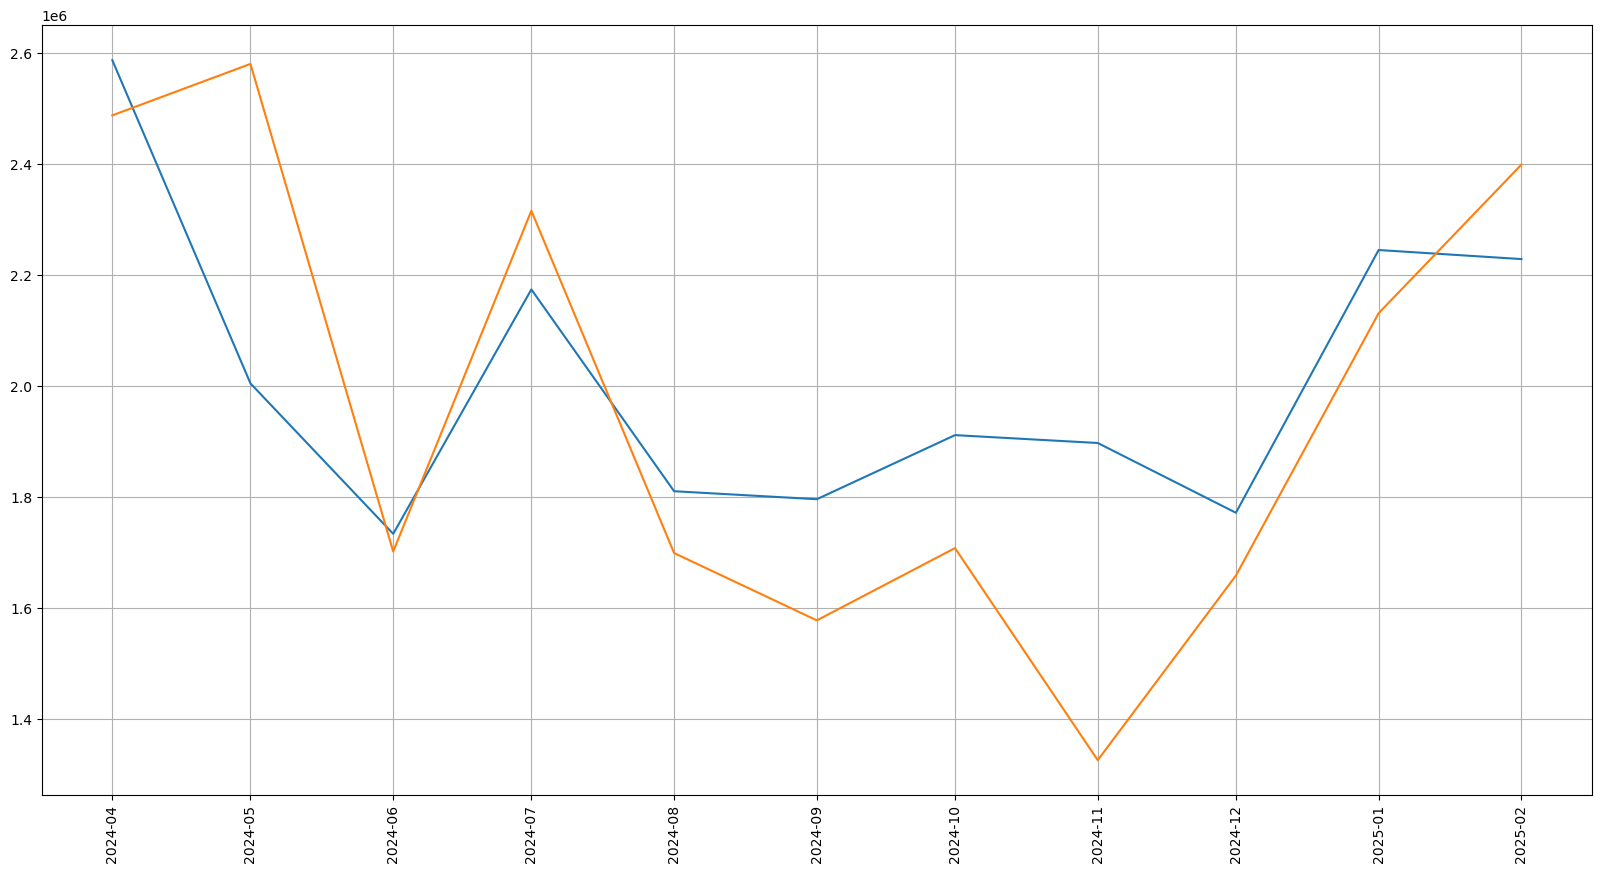

In [ ]:
# plot Prediction vs Actual in Test period
plt.figure(figsize=(20, 10))
plt.plot(bcm_multi_prdct['ds'],bcm_multi_prdct['yhat'])
plt.plot(bcm_multi_prdct['ds'],bcm_test['TOT_PAID'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

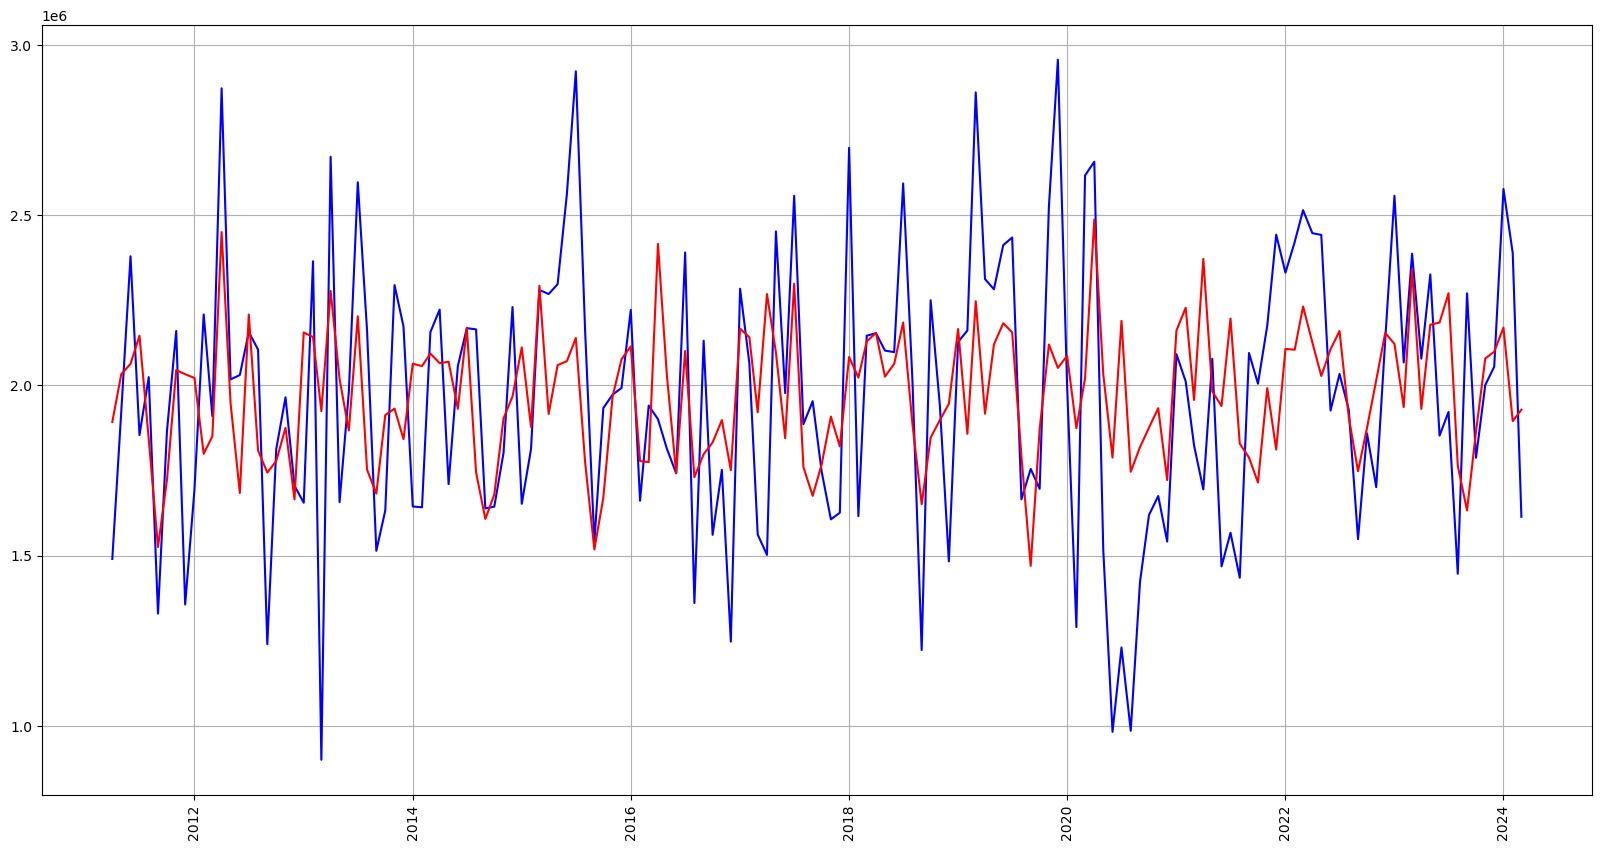

In [50]:
# plot Prediction vs Actual in Test period
plt.figure(figsize=(20, 10))

plt.plot(bcm_train_prophet['ds'],bcm_train['TOT_PAID'],color='b')
plt.plot(bcm_multi_prdct_train['ds'],bcm_multi_prdct_train['yhat'],color='r')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()